# 1. Import libraries:

In [1]:
import numpy as np    # For woworking with arrays.
import pandas as pd   # For data manipulation and analysis.

# For data visualization:
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Algorithms:
from sklearn.model_selection import train_test_split  # For Comparing, validating and choosing parameters and models.
from sklearn.linear_model import LogisticRegression   # For Predicting a continuous-valued attribute associated with an object.
from sklearn.tree import DecisionTreeClassifier    # A decision tree classifier.
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor    # K-nearest neighbor classifier.
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR    # Support vector machine.
from sklearn.ensemble import BaggingClassifier,BaggingRegressor,RandomForestClassifier,RandomForestRegressor # Ensemble methods.
from sklearn.preprocessing import StandardScaler    # For feature extraction and normalization.
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix    # For model evaluation.
from sklearn.manifold import TSNE    # An approach to non-linear dimensionality reduction.
from sklearn import preprocessing    # For Feature extraction and normalization.

# Deep Learning Algorithms:
from keras.layers import Input, Dense    # For building neural networks blocks.
from keras.models import Model, Sequential    # Arbitrary model architectures.
from keras import regularizers    # To applie a L2 regularization penalty.

In [2]:
# Ignore warnings:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Let's read our data:
df = pd.read_csv('C:\\Users\\2022\\Documents\\My works\\CodeClause\\Credit Card Fraud Detection\\creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Let's look at the summary of our dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### We can notice that there are no null values in our dataset.

# 2. EDA:

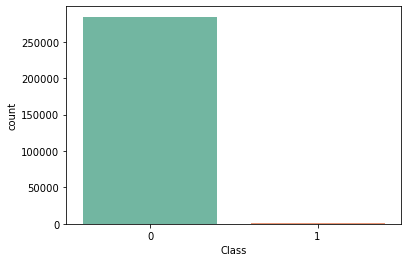

In [5]:
# We represent the counts of fraudulent and non-fraudulent:
fig, ax = plt.subplots(figsize = (6, 4))

ax = sns.countplot(data = df, x = 'Class', palette = "Set2")

### As we can see from this countplot, the classes 0 & 1 are highly imbalanced.

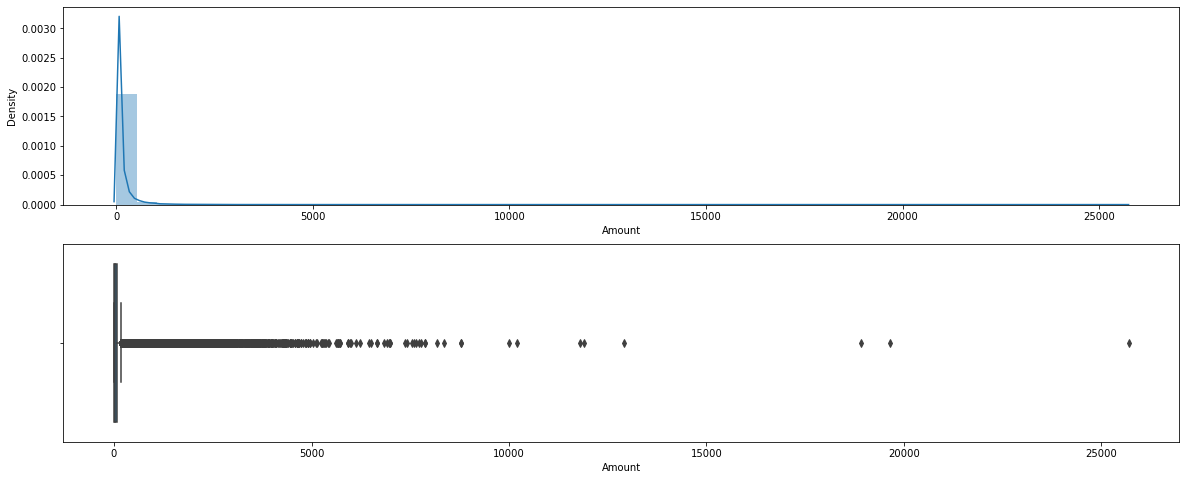

In [6]:
# Let's take a look at the Amount. Upon plotting the distribution chart and boxplot:
fig, (ax1, ax2) = plt.subplots(2,1, figsize = (20, 8))

sns.distplot(df['Amount'], ax = ax1)
sns.boxplot(df['Amount'], ax = ax2)
plt.show()

### we can see the feature is heavily right-skewed and has a large number of outliers and this can mislead the credit card fraud detection model.

In [7]:
# Let's explore some statistics of the amount:
df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [8]:
# we discard all the data points that are beyond 8000 amount to remove extreme outliers and, 
# at the same time, not losing any of our fraudulent user data. 
from scipy.stats import iqr

upper_bound = df['Amount'].quantile(0.75) + (1.5 * iqr(df['Amount']))

print(upper_bound)
print(df[df['Amount'] > upper_bound]['Class'].value_counts())

184.5125
0    31813
1       91
Name: Class, dtype: int64


In [9]:
# The Percentage of fraudulent activity: 0.17%:
df = df[df['Amount'] <= 8000]

print(df['Class'].value_counts())
print('\nPercentage of fraudulent activity: {:.2%}'.format((df[df['Class'] == 1].shape[0] / len(df))))

0    284303
1       492
Name: Class, dtype: int64

Percentage of fraudulent activity: 0.17%


Text(0.5, 1.0, 'Genuine Transactions')

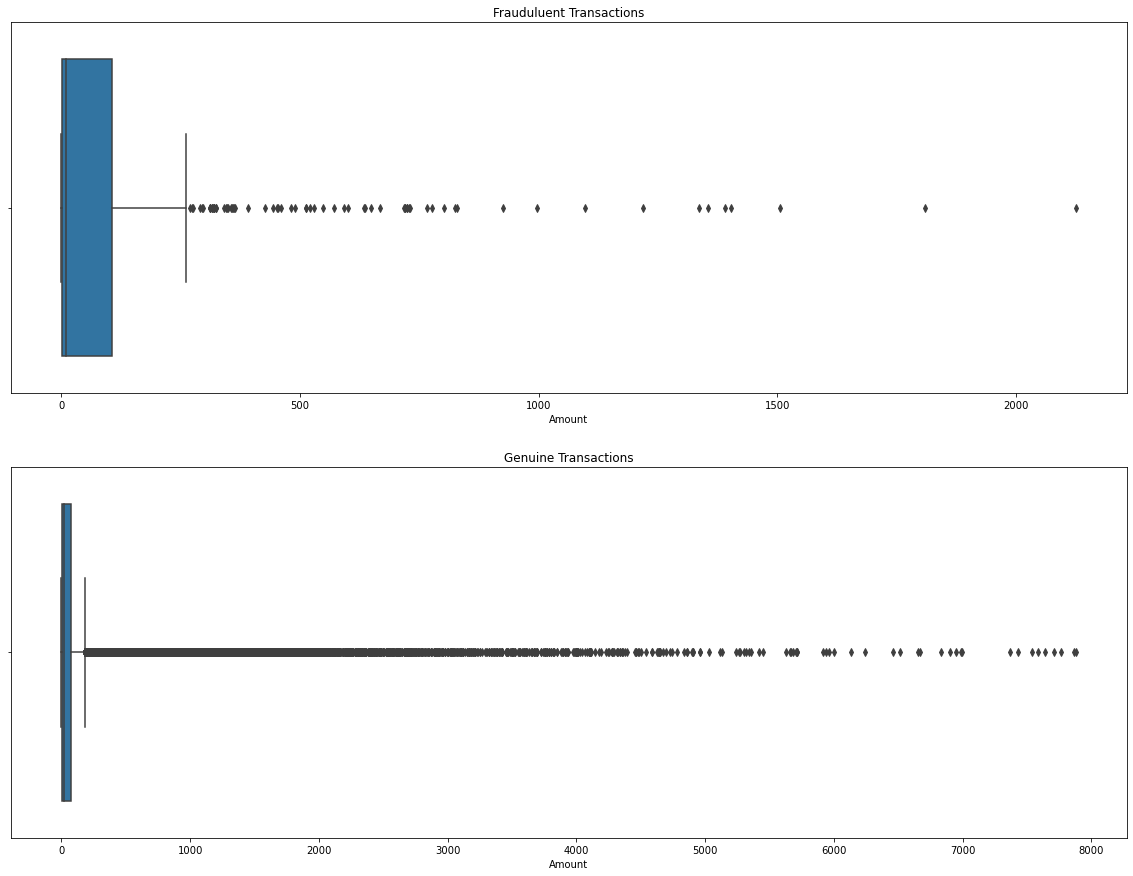

In [10]:
# Box plots of the amount of frauduluent and genuine usrs:
fig, (ax1, ax2) = plt.subplots(2,1, figsize = (20, 15))

sns.boxplot('Amount', data = df[df['Class'] == 1], ax = ax1)
ax1.set_title('Frauduluent Transactions')

sns.boxplot('Amount', data = df[df['Class'] == 0], ax = ax2)
ax2.set_title('Genuine Transactions')

### By looking at the Box plots of the amount of frauduluent and genuine usrs, we can see that most of the outliers have been removed.

# 3.Understanding the Correlation Among the Features in the Data:

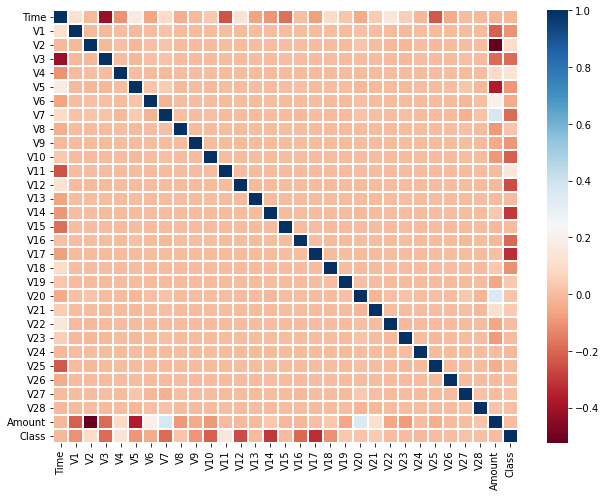

In [11]:
# Let's now look at the correlation among the features:
df_corr = df.corr()

fig, ax = plt.subplots(figsize = (9, 7))

sns.heatmap(df_corr, xticklabels = df_corr.columns, yticklabels = df_corr.columns
            , linewidths = 0.1, cmap = 'RdBu', ax = ax)

plt.tight_layout()

### We can conclude that the features are not showing any strong correlation relationship among themselves. So, we do not have to remove any feature based on correlation analysis.

In [12]:
# We pick any 2000 rows from the non-fraudulent users randomly:
non_fraud = df[df['Class'] == 0].sample(2000)
fraud = df[df['Class'] == 1]
len(non_fraud), len(fraud)

(2000, 492)

In [13]:
# We combine this randomly selected sample to the fraudulent user data to create our training dataset:
df_train = non_fraud.append(fraud).sample(frac = 1).reset_index(drop = True)

X = df_train.drop(['Class'], axis = 1).values
y = df_train['Class'].values

### In the beginning, we saw that the data is highly imbalanced. so, we will be using the undersampling technique to reduce the data points of the majority class to balance it with the minority class. This helps in overcoming the imbalance class issue.

In [14]:
# We use TSNE to perform dimensionality reduction to visualize N-dimensions:
dr = TSNE(n_components = 2, random_state = 24).fit_transform(X)

dr

array([[ 45.40775   ,  13.994858  ],
       [ 48.296223  , -22.430103  ],
       [ 45.204952  ,  20.830927  ],
       ...,
       [ 41.285072  ,   0.08260727],
       [ 14.39564   ,  18.998404  ],
       [ 38.330112  ,  -6.3736863 ]], dtype=float32)

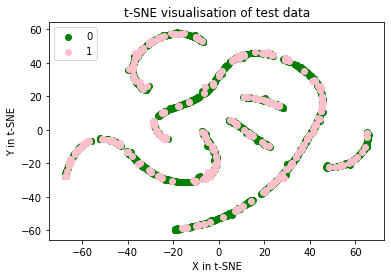

In [15]:
# Let's plot TSNE:
color_map = {0: 'green', 1: 'pink'}
plt.figure()

for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x = dr[y == cl, 0],
                y = dr[y == cl, 1],
                c = color_map[idx],
                label = cl)
    
plt.xlabel('X in t-SNE')
plt.ylabel('Y in t-SNE')
plt.legend(loc = 'upper left')
plt.title('t-SNE visualisation of test data')
plt.show()

### We see from the above graph, the data points of fraudulent and non-fraudulent users are overlapping which might be difficult for the user to comprehend. 

# 4. Constructing the Autoencoder for Fraud Detection:

In [16]:
# First, we will scale our data:
X_scale = preprocessing.MinMaxScaler().fit_transform(X)
X_norm, X_fraud = X_scale[y == 0], X_scale[y == 1]

In [17]:
# 1. Constructing the autoencoder:
autoencoder = Sequential()

In [18]:
# We are using optimizers “relu” and “tanh” in the hidden layers of the autoencoder.
# The optimizer of the autoencoder is “adadelta” while the loss will be calculated using “mean square error”.
autoencoder.add(Dense(X.shape[1], activation = 'tanh'))
autoencoder.add(Dense(100, activation = 'tanh'))
autoencoder.add(Dense(50, activation = 'relu'))
autoencoder.add(Dense(50, activation = 'tanh'))
autoencoder.add(Dense(100, activation = 'tanh'))
autoencoder.add(Dense(X.shape[1], activation = 'relu'))

In [19]:
autoencoder.compile(optimizer = 'adadelta', loss = 'mse')

In [20]:
# 2. Training the Autoencoder:
# We train the autoencoder on the data of non-fraudulent users:
# We train the autoencoder for 10 epochs with an 80:20 train validation split, the batch size for training will be 256:
autoencoder.fit(X_norm, X_norm,
                batch_size = 256, epochs = 10,
                shuffle = True, validation_split = 0.20);

Epoch 1/10
7/7 [==============================] - 4s 76ms/step - loss: 0.3031 - val_loss: 0.3028
Epoch 2/10
7/7 [==============================] - 0s 16ms/step - loss: 0.3028 - val_loss: 0.3024
Epoch 3/10
7/7 [==============================] - 0s 16ms/step - loss: 0.3025 - val_loss: 0.3021
Epoch 4/10
7/7 [==============================] - 0s 16ms/step - loss: 0.3022 - val_loss: 0.3018
Epoch 5/10
7/7 [==============================] - 0s 16ms/step - loss: 0.3019 - val_loss: 0.3015
Epoch 6/10
7/7 [==============================] - 0s 18ms/step - loss: 0.3016 - val_loss: 0.3012
Epoch 7/10
7/7 [==============================] - 0s 18ms/step - loss: 0.3013 - val_loss: 0.3008
Epoch 8/10
7/7 [==============================] - 0s 17ms/step - loss: 0.3009 - val_loss: 0.3005
Epoch 9/10
7/7 [==============================] - 0s 17ms/step - loss: 0.3006 - val_loss: 0.3002
Epoch 10/10
7/7 [==============================] - 0s 15ms/step - loss: 0.3003 - val_loss: 0.2998


In [21]:
# Using this trained autoencoder, we will be extracting the hidden representation of our data into a Sequential model and we 
# will predict the learned representation for non-fraudulent and fraudulent users using this model:
hidden_representation = Sequential()
hidden_representation.add(autoencoder.layers[0])
hidden_representation.add(autoencoder.layers[1])
hidden_representation.add(autoencoder.layers[2])

In [22]:
# Basically, the hidden patterns that the Autoencoder has learned from the data will be utilized to transform it for training
# models:
norm_hid_rep = hidden_representation.predict(X_norm)
fraud_hid_rep = hidden_representation.predict(X_fraud)

16/16 [==============================] - 0s 2ms/step


In [23]:
rep_X = np.append(norm_hid_rep, fraud_hid_rep, axis = 0)
y_n = np.zeros(norm_hid_rep.shape[0])
y_f = np.zeros(fraud_hid_rep.shape[0])
rep_y = np.append(y_n, y_f)

In [24]:
# And again we use TSNE to perform dimensionality reduction to visualize N-dimensions:
new_dr = TSNE(n_components = 2, random_state = 24).fit_transform(rep_X)

new_dr

array([[ 10.939835 ,   8.772857 ],
       [ -4.6613874,  28.21876  ],
       [ 12.705906 , -47.118683 ],
       ...,
       [ 70.31801  , -14.782033 ],
       [ 45.578415 ,   4.4866877],
       [ 30.09174  ,  44.100536 ]], dtype=float32)

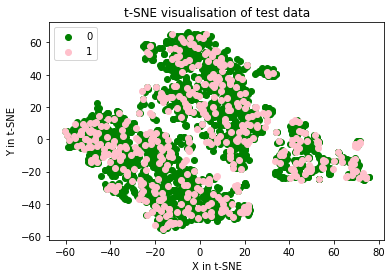

In [25]:
# Now let's try to visualize the hidden representations of the training data using TSNE dimensionality reduction:
# Let's plot TSNE:
color_map = {0: 'green', 1: 'pink'}
plt.figure()

for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x = new_dr[y == cl, 0],
                y = new_dr[y == cl, 1],
                c = color_map[idx],
                label = cl)
    
plt.xlabel('X in t-SNE')
plt.ylabel('Y in t-SNE')
plt.legend(loc = 'upper left')
plt.title('t-SNE visualisation of test data')
plt.show()

### Now we can differentiate between the fraudulent and non-fraudulent population, unlike earlier when the data was overlapping.

# 5. Training Logistic Regression for Credit Card Fraud Detection:

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       495
           1       0.95      0.87      0.91       128

    accuracy                           0.96       623
   macro avg       0.96      0.93      0.94       623
weighted avg       0.96      0.96      0.96       623



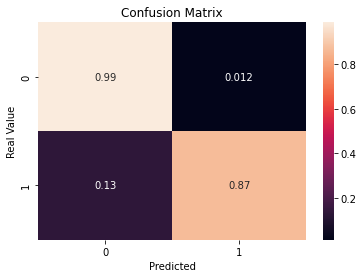

In [26]:
# Now let's use our data to train our logistic regression model:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
clf = LogisticRegression(solver = 'lbfgs').fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Classification report:
print(classification_report(y_test, y_pred))

# Confusion matrix:
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred, normalize = 'true'), annot = True, ax = ax)

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Real Value')
plt.show()

# 6. Training Decision Tree for Credit Card Fraud Detection:

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       495
           1       1.00      0.81      0.90       128

    accuracy                           0.96       623
   macro avg       0.98      0.91      0.94       623
weighted avg       0.96      0.96      0.96       623



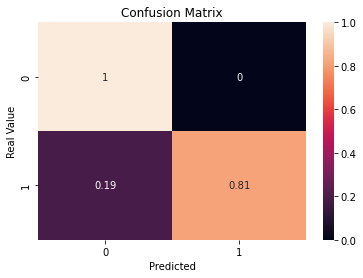

In [27]:
# Now let's use our data to train our decision tree model:
tree_model = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
tree_model.fit(X_train, y_train)
y_tree_pred = tree_model.predict(X_test)

# Classification report:
print(classification_report(y_test, y_tree_pred))

# Confusion matrix:
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_tree_pred, normalize = 'true'), annot = True, ax = ax)

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Real Value')
plt.show()

# 7. Training KNN for Credit Card Fraud Detection:

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       495
           1       1.00      0.81      0.90       128

    accuracy                           0.96       623
   macro avg       0.98      0.91      0.94       623
weighted avg       0.96      0.96      0.96       623



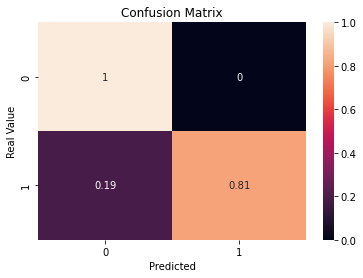

In [28]:
# Now let's use our data to train our KNN model:
n = 7
KNN = KNeighborsClassifier(n_neighbors = n)
KNN.fit(X_train, y_train)
knn_yhat = KNN.predict(X_test)

# Classification report:
print(classification_report(y_test, y_tree_pred))

# Confusion matrix:
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_tree_pred, normalize = 'true'), annot = True, ax = ax)

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Real Value')
plt.show()

# 8. Training SVM for Credit Card Fraud Detection:

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       495
           1       1.00      0.81      0.90       128

    accuracy                           0.96       623
   macro avg       0.98      0.91      0.94       623
weighted avg       0.96      0.96      0.96       623



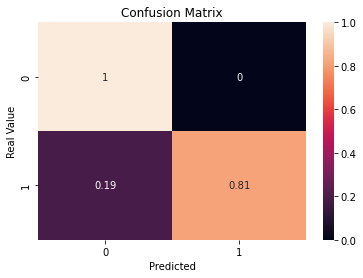

In [29]:
# # Now let's use our data to train our SVM model:
svm = SVC()
svm.fit(X_train, y_train)
svm_yhat = svm.predict(X_test)

# Classification report:
print(classification_report(y_test, y_tree_pred))

# Confusion matrix:
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_tree_pred, normalize = 'true'), annot = True, ax = ax)

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Real Value')
plt.show()

# 9. Training random forest for Credit Card Fraud Detection:

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       495
           1       1.00      0.81      0.90       128

    accuracy                           0.96       623
   macro avg       0.98      0.91      0.94       623
weighted avg       0.96      0.96      0.96       623



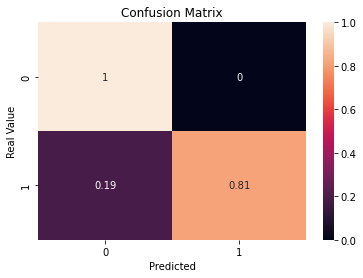

In [30]:
# Now let's use our data to train our random forest model:
rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train, y_train)
rf_yhat = rf.predict(X_test)

# Classification report:
print(classification_report(y_test, y_tree_pred))

# Confusion matrix:
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_tree_pred, normalize = 'true'), annot = True, ax = ax)

ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Real Value')
plt.show()